# 1. Loading libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# 2. Defining volcano plot function

In [6]:
def create_volcano_plot(temp_combination_df, combination, path, significance_threshold, fold_change_threshold):
    """
    Function to create a volcano plot based on fold change and adjusted p-values.

    Parameters:
    - temp_combination_df (DataFrame): DataFrame containing fold change, adjusted p-values, and protein information.
    - combination (str): Combination identifier used for naming the output files.
    - path (str): Path to save the plot.
    - significance_threshold (float): Threshold for significance.
    - fold_change_threshold (float): Threshold for fold change.

    Returns:
    None
    """

    # Rename columns for consistency
    df = temp_combination_df.rename(columns={'fold_change':'Fold Change','pval':'p-value','protein':'Gene'})

    # Convert p_adj to numeric, handle errors
    df['p_adj'] = pd.to_numeric(df['p_adj'], errors='coerce')

    # Define color based on conditions
    df['Color'] = np.where((df['Fold Change'] < -fold_change_threshold) & (df['p_adj'] < significance_threshold), 'downregulated',
                          np.where((df['Fold Change'] > fold_change_threshold) & (df['p_adj'] < significance_threshold), 'upregulated', 'no significant'))
    #print(df.head())

    specific_colors_dict = {'upregulated': 'red', 'no significant': 'grey', 'downregulated': 'blue'}

    # Create a custom palette using the specific colors dictionary
    custom_palette = {value: specific_colors_dict[value] if value in specific_colors_dict else 'gray' for value in df['Color'].unique()}

    # Plot the scatter plot using the custom palette
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Fold Change', y=-np.log10(df['p_adj']), hue='Color', palette=custom_palette)

    # Annotate significant points
    texts = []
    for index, row in df.iterrows():
        if (abs(row['Fold Change']) > fold_change_threshold) and (row['p_adj'] < significance_threshold):
            texts.append(plt.text(row['Fold Change'], -np.log10(row['p_adj']), row['Gene'], horizontalalignment='center', verticalalignment='bottom', fontsize=12))

    # Adjust text positions to avoid overlap
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.axhline(-np.log10(significance_threshold), color='black', linestyle='--', label='Threshold')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10(p_adj)')
    plt.title(combination)
    plt.legend(title='Regulation')  

    # Get the current date
    current_date = datetime.now()
    # Convert the current date to a string if needed
    current_date_str = current_date.strftime('%Y-%m-%d')  # Format as 'YYYY-MM-DD'

    # Save the plot as a PNG file with resolution (dpi) set to 300
    filename = path + '%s_FoldChange_%s.png' % (current_date_str, combination)
    plt.grid()
    plt.savefig(filename, dpi=300)  
    plt.show()

# 2. Loading data

In [7]:
# some parameters needed
group = "example"
path='C:/Users/bciez/Documents/practice_folder/python_codes/output/'

# loading example data
df = pd.read_csv('C:/Users/bciez/Documents/practice_folder/python_codes/data/volcano_plot_input_%s.csv'%(group))
df.head()


,protein,fold_change,pval,n healthy,n sick,p_adj
0,P1,-0.330957,9.080000e-31,1006,48603,2.660000e-27
1,P2,0.136998,3.830000e-19,1006,48603,5.590000e-16
2,P3,-0.089243,1.160000e-18,1006,48603,1.130000e-15
3,P4,0.140699,2.120000e-16,1006,48603,1.550000e-13
4,P5,0.111402,1.660000e-15,1006,48603,9.710000e-13


# 3. Plotting and saving 

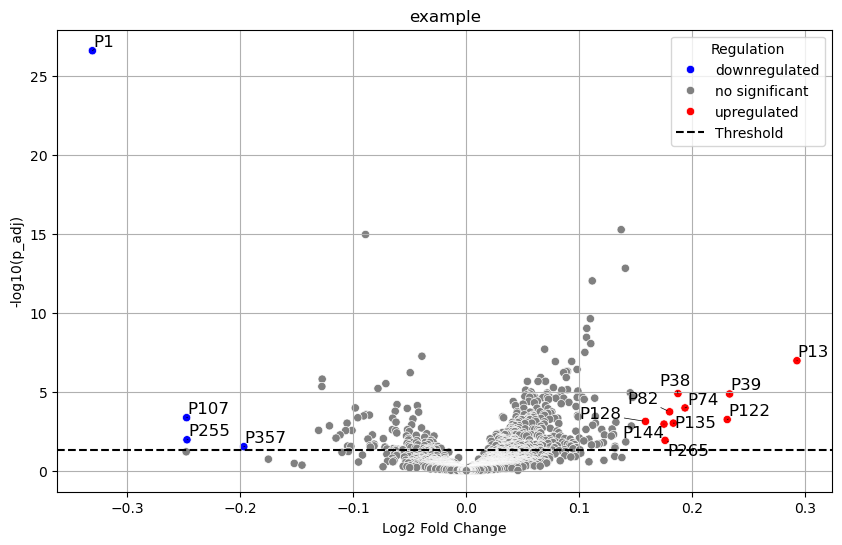

In [8]:
# create plot with the example data
create_volcano_plot(df, combination=group,path=path,significance_threshold=0.05,fold_change_threshold=0.15)